**Computational Physics Project 1**
Labib, Lucas, Sophia, and Bode
january 25 2024


Our First goal is to create an analytical plot of a simulated ball dropping so that we can compare our discretization method to it.
Fortunately, a ball dropping from rest is relativly easily analyzed, using kinematic equations:
$$y = y_0 + v_0t + \frac{1}{2}gt^2$$

An analytical simulation will plot y values for times t and graph them. code follows below.


Import libaries

In [99]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Define Function for height of ball

In [100]:
def y_analytical(t, g, y0, v0):
  return y0 + v0*t + 0.5*g*(t**2)

Initialize values and set time range and step

In [101]:
g = -9.8 #setting gravity in meters/s
dt = 0.033 #time resolution, in seconds  ##what is the time resolution of the tracker?
tf = 0.8  #total time to simulate
y0 = 0 #initial height, in meters
v0=0 #Initial Velocity (in metres per second)
t0=0 #Initial Time (in s)

Create array of times and corresponding values of x

In [102]:
times = np.array([x for x in np.arange(0, tf, dt)])
heights = np.array([y_analytical(t, g, y0, v0) for t in times])
print(times)
print(heights)



[0.    0.033 0.066 0.099 0.132 0.165 0.198 0.231 0.264 0.297 0.33  0.363
 0.396 0.429 0.462 0.495 0.528 0.561 0.594 0.627 0.66  0.693 0.726 0.759
 0.792]
[ 0.        -0.0053361 -0.0213444 -0.0480249 -0.0853776 -0.1334025
 -0.1920996 -0.2614689 -0.3415104 -0.4322241 -0.53361   -0.6456681
 -0.7683984 -0.9018009 -1.0458756 -1.2006225 -1.3660416 -1.5421329
 -1.7288964 -1.9263321 -2.13444   -2.3532201 -2.5826724 -2.8227969
 -3.0735936]


Plot result:

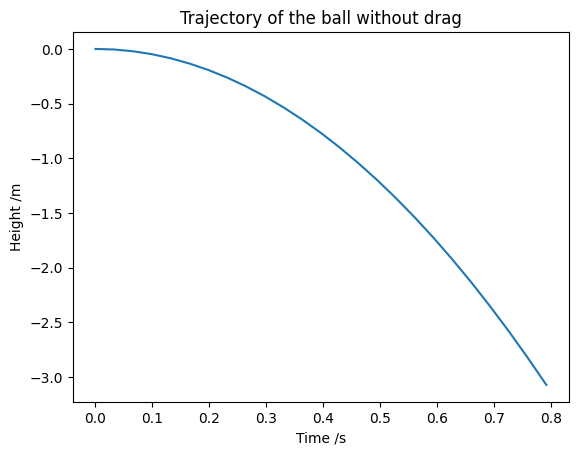

In [103]:
plt.plot(times,heights)
plt.title('Trajectory of the ball without drag')
plt.xlabel('Time /s')
plt.ylabel('Height /m')
plt.show()

Next, we can compare this graph the the graph of the base Euler method, which we did in the notebook "droping a ball," the code from which is copied below
*credit t Tim Aetherton*

Create arrays for time, velocity and position and

In [104]:
nsteps=int(tf/dt)+1 #note that we take the integer part
t = np.linspace(t0,tf,nsteps)
v = np.zeros([nsteps])
y = np.zeros([nsteps])
y[0]=y0
v[0]=v0
for i in range(1,nsteps):
    v[i]=v[i-1]+g*dt # Should be dt*Force/mass
    y[i]=y[i-1]+v[i]*dt

Main loop, where we successively update velocity and time according to the Euler rule

In [105]:
y[0]=y0
v[0]=v0
for i in range(1,nsteps):
    v[i]=v[i-1]+g*dt # Should be dt*Force/mass
    y[i]=y[i-1]+v[i]*dt

Plot both on top of eachother

**Runge-kutta calculations**

In [106]:
v_runge = np.zeros([nsteps])
y_runge = np.zeros([nsteps])



```
# This is formatted as code
```

Define first order ODE of dy/dx

In [107]:
def f(t,y):
  return v0 + g*t

Main loop, where we successively update velocity and time according to the Euler rule

In [108]:
y_runge[0]=y0
v_runge[0]=v0
for i in range(1,nsteps):
    k1 = f(t[i-1], y[i-1])
    h = dt # formula naming convention
    k2 = f(t[i-1] + (h/2), y_runge[i-1]+(h*k1/2))
    k3 = f(t[i-1] + (h/2), y_runge[i-1]+(h*k2/2))
    k4 = f(t[i-1] + h, y_runge[i-1]+(h*k3))
    y_runge[i] = y_runge[i-1]+ (h/6)*(k1+2*k2+2*k3+k4)


In [109]:
#trying indexing differently:
#also works but unecessary now that I fixed the first one
"""
y_runge[0]=y0
v_runge[0]=v0
for i in range(0,nsteps-1):
    k1 = f(t[i], y[i])
    h = dt # formula naming convention
    k2 = f(t[i] + (h/2), y_runge[i]+(h*k1/2))
    k3 = f(t[i] + (h/2), y_runge[i]+(h*k2/2))
    k4 = f(t[i]+ h, y_runge[i]+(h*k3))
    y_runge[i+1] = y_runge[i]+ (h/6)*(k1+2*k2+2*k3+k4)
"""

'\ny_runge[0]=y0\nv_runge[0]=v0\nfor i in range(0,nsteps-1):\n    k1 = f(t[i], y[i])\n    h = dt # formula naming convention\n    k2 = f(t[i] + (h/2), y_runge[i]+(h*k1/2))\n    k3 = f(t[i] + (h/2), y_runge[i]+(h*k2/2))\n    k4 = f(t[i]+ h, y_runge[i]+(h*k3))\n    y_runge[i+1] = y_runge[i]+ (h/6)*(k1+2*k2+2*k3+k4)\n'

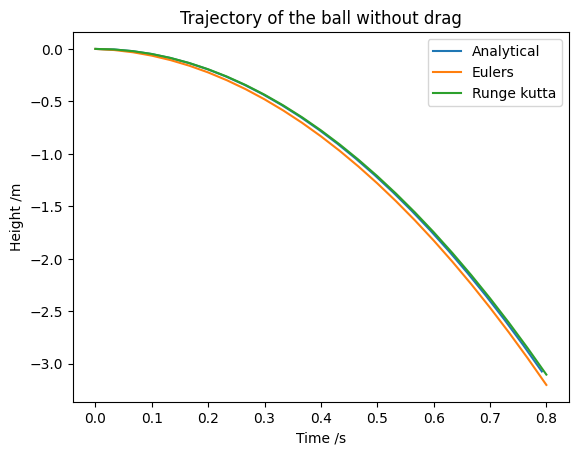

In [110]:
plt.plot(times,heights, label = 'Analytical')
plt.plot(t,y, label = 'Eulers')
plt.plot(t,y_runge, label = 'Runge kutta')
plt.title('Trajectory of the ball without drag')
plt.xlabel('Time /s')
plt.ylabel('Height /m')
plt.legend()
plt.show()

Next, we want to graph on the same plot the actual data we collected from dropping a ball. the following code reads in a csv file to create a new set of points (height and time) for the experimental data, and graphs it on the same plot

Read in and store desired data sets

In [111]:

# List of CSV files for each ball
csv_files_small = ['smallBall_1.csv', 'smallBall_2.csv', 'smallBall_3.csv', 'smallBall_4.csv', 'smallBall_5.csv']
csv_files_medium = ['mediumBall_1.csv', 'mediumBall_2.csv', 'mediumBall_3.csv', 'mediumBall_4.csv', 'mediumBall_5.csv']
csv_files_big = ['bigBall_1.csv', 'bigBall_2.csv', 'bigBall_3.csv', 'bigBall_4.csv', 'bigBall_5.csv']

In [60]:
# Function to read and plot a CSV file
def read_and_plot_csv(file_name, label):
    # Read CSV file into a DataFrame
    file_path =  'Sample_data/' + file_name
    df = pd.read_csv(file_path)
    x = df['time']
    y = df['height']
    plt.plot(x, y, label=label, linestyle='dotted')
    return y

In [113]:
# Labels for each trial
trial_labels = ['trial1', 'trial2', 'trial3', 'trial4', 'trial5']

Plot the experimental data on top of the two other curves for each of the objects

In [66]:
def plot_trials_no_drag(csv_files,ball_size):
    plt.plot(times, heights, label = 'Analytical')
    plt.plot(t,y, label = 'Eulers')
    plt.plot(t,y_runge, label = 'Runge-kutta')
    y_values = []
    # Iterate through the CSV files and plot them
    for i, (file, label) in enumerate(zip(csv_files, trial_labels), start=1):
        y_values.append(read_and_plot_csv(file, label))
    plt.xlabel('Time [s]')
    plt.ylabel('Height [m]')
    plt.title(f'Trajectory of the {ball_size} without drag')
    plt.legend()
    plt.show()
    return y_values

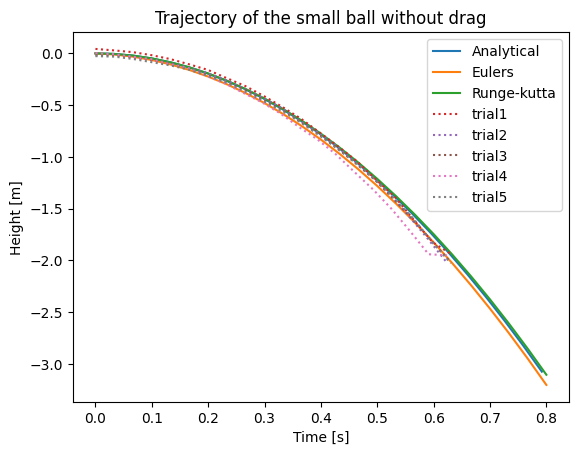

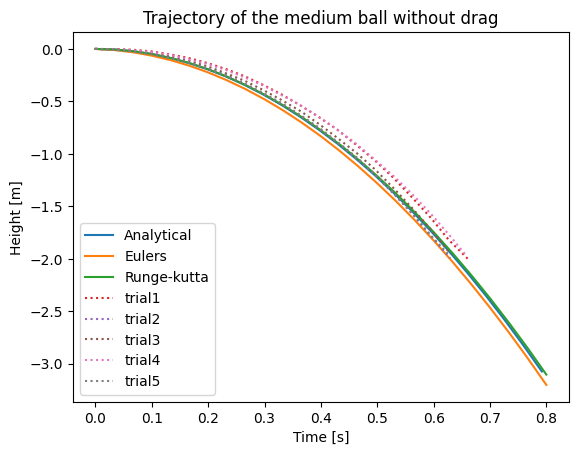

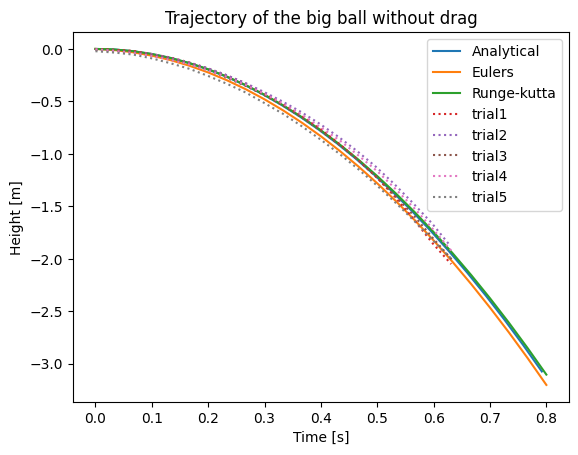

In [67]:
# Plot small ball
y_small_ball_trials = plot_trials_no_drag(csv_files_small, 'small ball')

# Plot medium ball
y_medium_ball_trials = plot_trials_no_drag(csv_files_medium, 'medium ball')

# Plot big ball
y_big_ball_trials = plot_trials_no_drag(csv_files_big, 'big ball')

Now, we will introduce drag, and measure its effects on our results. The equations for the force of drag is:

$F_d = \frac{1}{2}\rho v^2 C_d A$

Where $\rho$ is the density of the fluid, $v$ is the free-stream velocity of the fluid, $A$ is the crossectional refrence area, $C_d$ is the experimentally derived coeffecient of drag. In our case, we can define $v$ to the velocity of the ball, and manually input $\rho$ and $A$ case by case. We can set them in the below box:

In [115]:
#variables for drag
drag = 0.47 #example values: 0.47 for sphere
density = 1.293 # density of air at STP
area = 3.14*(.05**2) #replace r with the diameter of the ball
mass = .05 #needed

Note that $C_d$ can be a fair bit more complicated, and is typicially dependant on the Reynolds number. For the purpose of simplification, we are going to assume that our $C_d$ is a constant that the user of the program has already calculated.

Now, we can add this to our model of the ball. The analytical solution to a ball falling is quite complicated, but assuming a starting velocity of 0 it comes to:

$$x(t) = -\frac{m}{b}\ln(\sin(f\sqrt{\frac{bg}{m}})) + h_0
\quad where \quad b= \frac{1}{2}\rho C_d A$$

This will be used to check our models

The first model we will use is the Euler Model. We can do this by using Euler approximations of the accelration formula. This can be derived from Newtown's second law:

$$ F = ma = F_g + F_d = mg + \frac{1}{2}\rho C_d A v^2$$

$$\frac{d^2 y}{dt^2} = g + \frac{\rho C_d}{2m}  \Bigl( \frac{dy}{dt}\Bigl)^2$$


This is a second order differential equation, and can be broken down into the following Euler system

$$\vec{y_n} =
\begin{pmatrix}
y_n \\
y_n'
\end{pmatrix} =
\begin{pmatrix}
y_{n-1}+Δt*y_n'\\
= y_{n-1}' +\Delta t*y_{n-1}''
\end{pmatrix}
$$

Implemented this looks like:


In [116]:
nsteps=int(tf/dt)+1 #recalcutate steps
v_drag = np.zeros([nsteps])
y_drag = np.zeros([nsteps])
y_drag[0]=y0
v_drag[0]=v0
for i in range(1,nsteps):
    v_drag[i]=v_drag[i-1]+(g+(density*drag*area*v_drag[i-1]**2)*(1/(2*mass)))*dt # uing v
    y_drag[i]=y_drag[i-1]+v_drag[i]*dt

Runge-kutta's f for drag. f defines first order ODE of dy/dx = f(t,y)

In [117]:
# def f(t, y):
#   return v_drag_prev+(g+(density*drag*area*v_drag_prev**2)*(1/(2*mass)))*dt
def f_with_drag(t, y, v_prev):
    velocity = v_prev + (g + (density * drag * area * v_prev**2) / (2 * mass)) * dt
    return velocity

Runge-kutta for the drag version

In [118]:
v_drag_runge = np.zeros([nsteps])
y_drag_runge = np.zeros([nsteps])

In [119]:
y_drag_runge[0]=y0
v_drag_runge[0]=v0
for i in range(1,nsteps):
    prev_v = v_drag_runge[i-1]
    k1 = f_with_drag(y_drag_runge[i-1], dt, prev_v)
    h = dt # formula naming convention
    k2 = f_with_drag(t[i-1] + (h/2), y_drag_runge[i-1]+(h*k1/2), prev_v)
    k3 = f_with_drag(t[i-1] + (h/2), y_drag_runge[i-1]+(h*k2/2), prev_v)
    k4 = f_with_drag(t[i-1] + h, y_drag_runge[i-1]+(h*k3), prev_v)
    y_drag_runge[i] = y_drag_runge[i-1]+ (h/6)*(k1+2*k2+2*k3+k4)

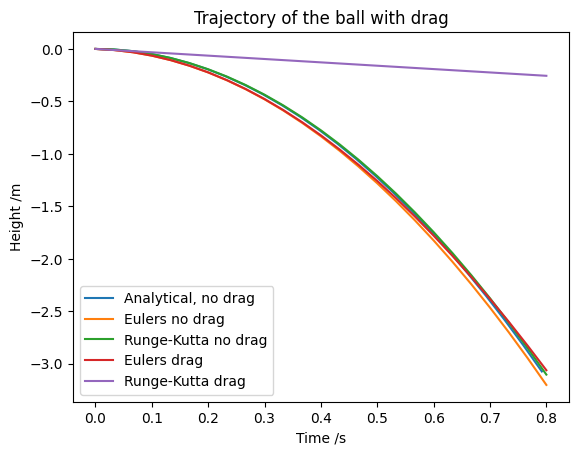

In [120]:
plt.plot(times,heights, label = 'Analytical, no drag')
plt.plot(t,y, label = 'Eulers no drag')
plt.plot(t,y_runge, label = 'Runge-Kutta no drag')
plt.plot(t,y_drag, label = 'Eulers drag')
plt.plot(t,y_drag_runge, label = 'Runge-Kutta drag')
#plt.plot(times,heights_drag, label = 'Analytical, drag')
plt.title('Trajectory of the ball with drag')
plt.xlabel('Time /s')
plt.ylabel('Height /m')
plt.legend()
plt.show()

Plot the experimental data on top of the three other curves for each of the objects

In [63]:
def plot_trials_drag(csv_files, ball_size):
    # Plot medium ball
    plt.plot(times,heights, label = 'Analytical, drag')
    plt.plot(t,y, label = 'Eulers no drag')
    plt.plot(t,y_drag, label = 'Eulers drag')
    # Iterate through the CSV files and plot them
    for i, (file, label) in enumerate(zip(csv_files, trial_labels), start=1):
        read_and_plot_csv(file, label)
    plt.title(f'Trajectory of the {ball_size} with drag')
    plt.xlabel('Time /s')
    plt.ylabel('Height /m')
    plt.legend()
    plt.show()

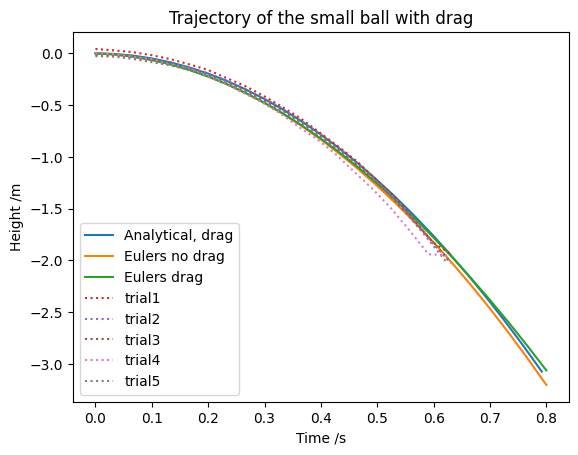

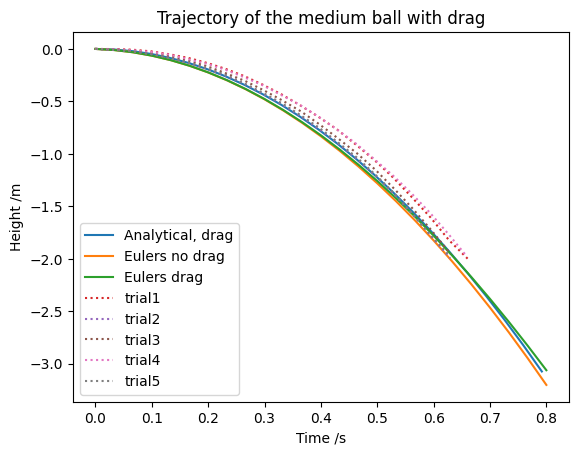

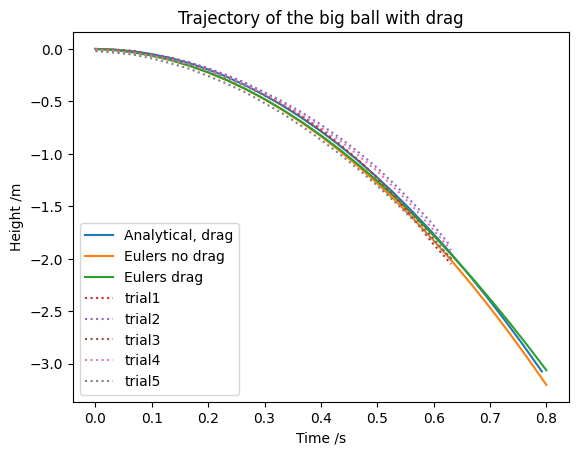

In [64]:
# Plot small ball
plot_trials_drag(csv_files_small, 'small ball')


# Plot medium ball
plot_trials_drag(csv_files_medium, 'medium ball')


# Plot big ball
plot_trials_drag(csv_files_big, 'big ball')

# Error Analysis

## Approach one: RMSE - Root Min Square Error

In [95]:
def calculate_rmse(predictions, targets):
    min_length = min(len(predictions), len(targets))
    predictions = predictions[:min_length]
    return np.sqrt(((predictions - targets) ** 2).mean())

## No drag vs Analytical

In [96]:
# No drag
print("No drag estimates vs analytical results")
print("")
print("Euler:", calculate_rmse(y, heights))

print("Runge-Kutta:", calculate_rmse(y_runge, heights))


No drag estimates vs analytical results

Euler: 0.07470539999999984
Runge-Kutta: 0.013584168819916425


## No drag vs Trials

In [101]:
def rsme_no_drag_analysis(ball_trials):
    for i,y_trial in enumerate(ball_trials):
        print(f'trial {i}:')
        print(f"Euler:", calculate_rmse(y, y_trial))
        print(f"Runge-Kutta:", calculate_rmse(y_runge, y_trial))
        print("")

### Small Ball Trials

In [102]:
print("No Drag estimates vs small ball trials")
print("")
rsme_no_drag_analysis(y_small_ball_trials)

No Drag estimates vs small ball trials

trial 0:
Euler: 0.059102991855459634
Runge-Kutta: 0.03137912895394364

trial 1:
Euler: 0.05592295365864975
Runge-Kutta: 0.020436965955534386

trial 2:
Euler: 0.03261232134392171
Runge-Kutta: 0.025286628742124104

trial 3:
Euler: 0.03943631130538386
Runge-Kutta: 0.07557935623921923

trial 4:
Euler: 0.02859224224315054
Runge-Kutta: 0.035186440311020334



### Medium Ball Trials

In [103]:
print("No Drag estimates vs medium ball trials")
print("")
rsme_no_drag_analysis(y_medium_ball_trials)

No Drag estimates vs medium ball trials

trial 0:
Euler: 0.159372896353393
Runge-Kutta: 0.10627936143667377

trial 1:
Euler: 0.049245759837903115
Runge-Kutta: 0.016544203239643368

trial 2:
Euler: 0.08458159617955376
Runge-Kutta: 0.03689399983114604

trial 3:
Euler: 0.1722459662518113
Runge-Kutta: 0.11904196275725955

trial 4:
Euler: 0.05653761078659061
Runge-Kutta: 0.016767785375147184



### Big Ball Trials

In [104]:
print("No Drag estimates vs big ball trials")
print("")
rsme_no_drag_analysis(y_big_ball_trials)

No Drag estimates vs big ball trials

trial 0:
Euler: 0.04615766882300277
Runge-Kutta: 0.038148108413602895

trial 1:
Euler: 0.10369296643811003
Runge-Kutta: 0.053626002952998485

trial 2:
Euler: 0.035073483951662154
Runge-Kutta: 0.024671953371865334

trial 3:
Euler: 0.07049762029491144
Runge-Kutta: 0.02374981229347931

trial 4:
Euler: 0.027396645572368854
Runge-Kutta: 0.072534116171523



## Drag analysis

In [97]:
def rsme_drag_analysis(ball_trials):
    for i,y_trial in enumerate(ball_trials):
        print(f'trial {i}:')
        print(f"Euler:", calculate_rmse(y_drag, y_trial))
        print(f"Runge-Kutta:", calculate_rmse(y_drag_runge, y_trial))
        print("")

### Small Ball trials

In [98]:
print("Drag estimates vs small ball trials")
print("")
rsme_drag_analysis(y_small_ball_trials)

Drag estimates vs small ball trials

trial 0:
Euler: 0.051145329853572764
Runge-Kutta: 0.7984787264164348

trial 1:
Euler: 0.04580490207421248
Runge-Kutta: 0.7929903357224568

trial 2:
Euler: 0.025386649988879722
Runge-Kutta: 0.8117146956314854

trial 3:
Euler: 0.05133428182081175
Runge-Kutta: 0.8557109624372982

trial 4:
Euler: 0.025403267430134244
Runge-Kutta: 0.8184794208631901



### Medium Ball Trials

In [99]:
print("Drag estimates vs medium ball trials")
print("")
rsme_drag_analysis(y_medium_ball_trials)

Drag estimates vs medium ball trials

trial 0:
Euler: 0.13977760159601646
Runge-Kutta: 0.7832716744750763

trial 1:
Euler: 0.03932047366829007
Runge-Kutta: 0.7979233080871687

trial 2:
Euler: 0.07150653576611356
Runge-Kutta: 0.7657091251061471

trial 3:
Euler: 0.15145926050438938
Runge-Kutta: 0.7664245927994822

trial 4:
Euler: 0.04534517751912953
Runge-Kutta: 0.7909221282690162



### Big Ball Trials

In [100]:
print("Drag estimates vs big ball trials")
print("")
rsme_drag_analysis(y_big_ball_trials)

Drag estimates vs big ball trials

trial 0:
Euler: 0.046160938685307094
Runge-Kutta: 0.817217993974975

trial 1:
Euler: 0.08656993013650682
Runge-Kutta: 0.7382456185612611

trial 2:
Euler: 0.028615717179846113
Runge-Kutta: 0.8109968537186772

trial 3:
Euler: 0.054442809149145906
Runge-Kutta: 0.7710741760042218

trial 4:
Euler: 0.037703252749394976
Runge-Kutta: 0.8498120921545057



# Approach two: Manhattan Distance